# `nb06`: Latent variable models

<img src="./figures/nb05/lvm.png" width="40%" />

In [79]:
import numpy as np
from scipy.stats import norm, multivariate_normal, dirichlet, multinomial
import matplotlib.pyplot as plt

# Probabilistic PCA

In [33]:
# Parameters
n_latents = 2
n_features = 10

B = np.random.rand(n_features, n_latents)   # Set to random values
mu = 0
sigma2 = 1

# Forward generative model
z = norm(0, 1).rvs(size=n_latents)
x = norm(np.dot(B, z) + mu, sigma2).rvs()

print("z =", z)
print("x =", x)

z = [ 1.17774325 -0.94821282]
x = [-0.44172032 -0.18608575  0.37275116  0.42847191 -0.0063649   0.78179433
  1.34171837  0.88637937 -0.04742033  0.10613095]


# Mixture model

In [117]:
# Parameters
K = 3
N = 200

alpha = np.ones(K) * 1.5
sigma2_0 = np.array([[1.0, 0.0], [0.0, 1.0]]) * 5

# Forward generative model
theta = dirichlet(alpha).rvs()[0]
mu = multivariate_normal(np.zeros(2), sigma2_0).rvs(K)

z = multinomial(1, theta).rvs(N)
z = np.argmax(z, axis=1)
x = np.zeros((N, 2))

for i in range(N):
    x[i] = multivariate_normal(mu[z[i]]).rvs()

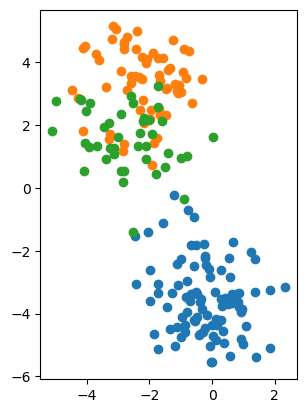

In [118]:
fig = plt.figure()
ax = plt.axes()

for k in range(K):
    ax.scatter(x[z == k, 0], x[z == k, 1])

ax.set(aspect="equal")
plt.show()

# Latent Dirichlet Allocation

In [ ]:
# http://www.cs.columbia.edu/~blei/talks/Blei_VI_tutorial.pdf